In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
train_path = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/iowa_housing/train.csv"

In [3]:
test_path = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/iowa_housing/test.csv"

In [4]:
train = pd.read_csv(train_path)

In [5]:
test = pd.read_csv(test_path)

In [303]:
def rmse(estimator, X, y):
    preds = estimator.predict(X)
    return np.sqrt(np.mean((preds - y)**2))

In [304]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [305]:
items_dict = {}

for items in train.columns:
    items_dict[str(items)] = train[str(items)].isnull().sum()

null_features = []
for k,v in items_dict.items():
    if v > 0:
        null_features.append(k)
print(null_features)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [306]:
train.shape

(1460, 82)

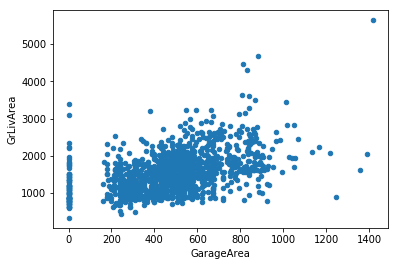

In [307]:
train.plot(kind="scatter", x ="GarageArea", y = "GrLivArea")
plt.show()

In [308]:
#break it up into CTS vs discrete variables 
for items in train.columns:
    print(items)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice
SalePrice_ln


In [309]:
train["Fireplaces"].isnull().sum()

0

In [310]:
train["SalePrice_ln"] = np.log(train["SalePrice"])

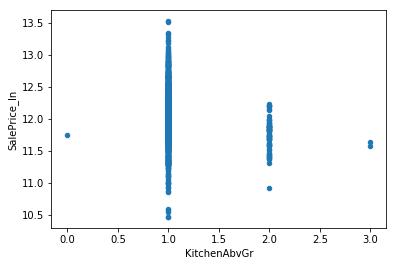

In [408]:
train.plot(kind = "scatter", x ="KitchenAbvGr" , y = "SalePrice_ln")

In [312]:
#train["sqft"] = train["GrLivArea"] + train["TotalBsmtSF"]

In [313]:
train[["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706,0,150,856
1,978,0,284,1262
2,486,0,434,920
3,216,0,540,756
4,655,0,490,1145


In [314]:
#train.drop("proportion", axis = 1, inplace = True)

In [315]:
#train["total_bath"] = train["BsmtFullBath"] + train["BsmtHalfBath"] + train["FullBath"] + train["HalfBath"]

In [316]:
import seaborn as sns
#sns.scatterplot(x = "GrLivArea", y = "SalePrice_ln", hue = 'second_floor', data = train)
#train.plot(kind = "scatter", x ="GrLivArea" , y = "SalePrice_ln",)

In [317]:
train[["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"]].head(100)

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,1,0,2,1
1,0,1,2,0
2,1,0,2,1
3,1,0,1,0
4,1,0,2,1
5,1,0,1,1
6,1,0,2,0
7,1,0,2,1
8,0,0,2,0
9,1,0,1,0


In [513]:
set(null_features) & set(["LotArea","LotFrontage",
          "YearBuilt","GarageYrBlt",
          "YearRemodAdd","MasVnrArea",
         "TotalBsmtSF","BsmtUnfSF",
          "BsmtFinSF2","BsmtFinSF1",
         "1stFlrSF","2ndFlrSF",
         "LowQualFinSF","GrLivArea",
         "GarageCars","GarageArea",
         "BsmtFullBath","BsmtHalfBath",
         "FullBath","HalfBath",
         "TotRmsAbvGrd","Fireplaces",
         "WoodDeckSF","OpenPorchSF","EnclosedPorch",
         "3SsnPorch","ScreenPorch","PoolArea",
         "MiscVal","MoSold","YrSold",
         "KitchenAbvGr","BedroomAbvGr"])

{'GarageYrBlt', 'LotFrontage', 'MasVnrArea'}

In [514]:
set(null_features) & set(["OverallQual",
"OverallCond",
"Condition1",
"Condition2",
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageFinish",
"GarageQual",
"GarageCond",
"PoolQC"])

{'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'PoolQC'}

In [558]:
#set(train["ExterCond"])

In [489]:
train["TotalSqft"] = train["GrLivArea"] + train["TotalBsmtSF"] + train["GarageArea"]
#GrLivArea + TotalBsmtSf + GarageArea

In [409]:
train["TotalBaths"] = train["HalfBath"] + train["FullBath"] + train["BsmtHalfBath"] + train["BsmtFullBath"]
# HalfBath + FullBath + BsmtHalfBath + BsmtFullBath

In [537]:
X = train[["LotArea",
          "YearBuilt",
          "YearRemodAdd","TotalSqft",
         "GarageCars","TotalBaths","OverallCond",
         "TotRmsAbvGrd","Fireplaces",
         "KitchenAbvGr","BedroomAbvGr",
           "WoodDeckSF","OpenPorchSF",
           "EnclosedPorch","3SsnPorch",
           "ScreenPorch"]]

y = train["SalePrice_ln"]

In [538]:
Z = (X - X.mean())/X.std()

In [539]:
from sklearn.model_selection import train_test_split 

In [540]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2, random_state = 2019)

In [553]:
from sklearn.linear_model import Ridge

In [554]:
lareg = Ridge()

In [555]:
alphas = np.logspace(-4,4,9)

In [556]:
from sklearn.model_selection import cross_val_score

lareg_scores = []

for a in alphas:
    lareg.set_params(alpha = a)
    scores = cross_val_score(estimator = lareg, scoring = rmse, X = X_train , y = y_train , cv = 10)
    lareg_scores.append((np.mean(scores), a))

In [557]:
lareg_scores

[(0.16874715230214207, 0.0001),
 (0.16874713473223574, 0.001),
 (0.16874695906424214, 0.01),
 (0.16874520548911054, 0.1),
 (0.168727978048795, 1.0),
 (0.1685844983130497, 10.0),
 (0.16881106925807648, 100.0),
 (0.19018185490574152, 1000.0),
 (0.3109000957361244, 10000.0)]

In [549]:
lareg = Lasso(alpha = 0.0001)

In [526]:
lareg.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [527]:
lareg.coef_

array([ 0.01327892,  0.11451441,  0.03595722,  0.14531555,  0.05566215,
        0.03929708,  0.06493207,  0.0597264 ,  0.0465547 , -0.0333956 ,
       -0.01259438,  0.01229015,  0.00569785,  0.02043255,  0.00885911,
        0.01747235])

In [528]:
coeffs = pd.DataFrame({
    "Variable": X_train.columns,
    "Weight": lareg.coef_    
}).sort_values(by = "Weight", ascending = True)

coeffs

,Variable,Weight
9,KitchenAbvGr,-0.033396
10,BedroomAbvGr,-0.012594
12,OpenPorchSF,0.005698
14,3SsnPorch,0.008859
11,WoodDeckSF,0.012290
0,LotArea,0.013279
15,ScreenPorch,0.017472
13,EnclosedPorch,0.020433
2,YearRemodAdd,0.035957
5,TotalBaths,0.039297


In [ ]:
##CTS 
SalePrice <- response

LotFrontage  #<-259 missing
LotArea **

YearBuilt **
GarageYrBlt

YearRemodAdd
MasVnrArea

BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF **


1stFlrSF
2ndFlrSF **
LowQualFinSF
GrLivArea **
GarageCars
GarageArea **
##TODO: new feature, total_sqft = GrLivArea + TotalBsmtSf + GarageArea

BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
##TODO: new feature, total_bath = HalfBath + FullBath + BsmtHalfBath + BsmtFullBath

TotRmsAbvGrd
Fireplaces ** 

WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea **
MiscVal
MoSold
YrSold

KitchenAbvGr
BedroomAbvGr

##Discrete 

##ordered -- must use pd.apply()
OverallQual
OverallCond
Condition1
Condition2
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
HeatingQC
KitchenQual
FireplaceQu
GarageFinish
GarageQual
GarageCond
PoolQC

##unordered -- must use pd.get_dummies()
MSSubClass 
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation
BsmtFinType1
BsmtFinType2
Heating
CentralAir
Electrical
Functional
GarageType
PavedDrive
Fence
MiscFeature
SaleType
SaleCondition
#TODO: new feature, existence of second floor? might be collinear with total_sqft



In [560]:
from sklearn.ensemble import RandomForestRegressor

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


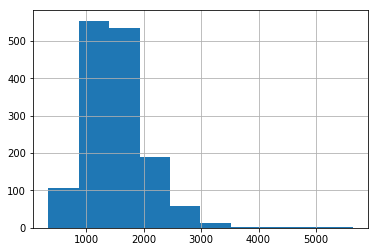

In [575]:
train["GrLivArea"].hist()

In [597]:
for items in train.dtypes[train.dtypes != "object"].index:
    print(items+":"," ",train[items].skew())

Id:   0.0
MSSubClass:   1.4076567471495591
LotFrontage:   2.163569142324884
LotArea:   12.207687851233496
OverallQual:   0.2169439277628693
OverallCond:   0.6930674724842182
YearBuilt:   -0.613461172488183
YearRemodAdd:   -0.5035620027004709
MasVnrArea:   2.669084210182863
BsmtFinSF1:   1.685503071910789
BsmtFinSF2:   4.255261108933303
BsmtUnfSF:   0.9202684528039037
TotalBsmtSF:   1.5242545490627664
1stFlrSF:   1.3767566220336365
2ndFlrSF:   0.8130298163023265
LowQualFinSF:   9.011341288465387
GrLivArea:   1.3665603560164552
BsmtFullBath:   0.596066609663168
BsmtHalfBath:   4.103402697955168
FullBath:   0.036561558402727165
HalfBath:   0.675897448233722
BedroomAbvGr:   0.21179009627507137
KitchenAbvGr:   4.488396777072859
TotRmsAbvGrd:   0.6763408364355531
Fireplaces:   0.6495651830548841
GarageYrBlt:   -0.6494146238714679
GarageCars:   -0.3425489297486655
GarageArea:   0.17998090674623907
WoodDeckSF:   1.5413757571931312
OpenPorchSF:   2.3643417403694404
EnclosedPorch:   3.0898719037

In [605]:
#train["BsmtFullBath"].hist()